In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Importing the dataset

In [3]:
#import dataset
dataset = pd.read_csv('insurance.csv')


In [4]:
dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
dataset.head()
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

#X[:,[0,2,3,4]]

### Data Exploration

#### Understanding the data

In [6]:
print("The number of rows in this dataset is:",len(dataset))

The number of rows in this dataset is: 1338


**Structure of the Dataset**

**Age**: age in years

**Sex**: gender (Female, Male)

**BMI**: Body mass index

**Children**: number of children / Number of dependents

**Smoker**: smoking, (yes, no)

**Region**: the beneficiary’s residential (northeast, southeast, southwest, northwest)

**Charges**: Individual medical costs


In [7]:
#missing_values = dataset.isnull()

missing_values = dataset.isnull().sum()

missing_values

dataset.age

0       19
1       18
2       28
3       33
4       32
        ..
1333    50
1334    18
1335    18
1336    21
1337    61
Name: age, Length: 1338, dtype: int64

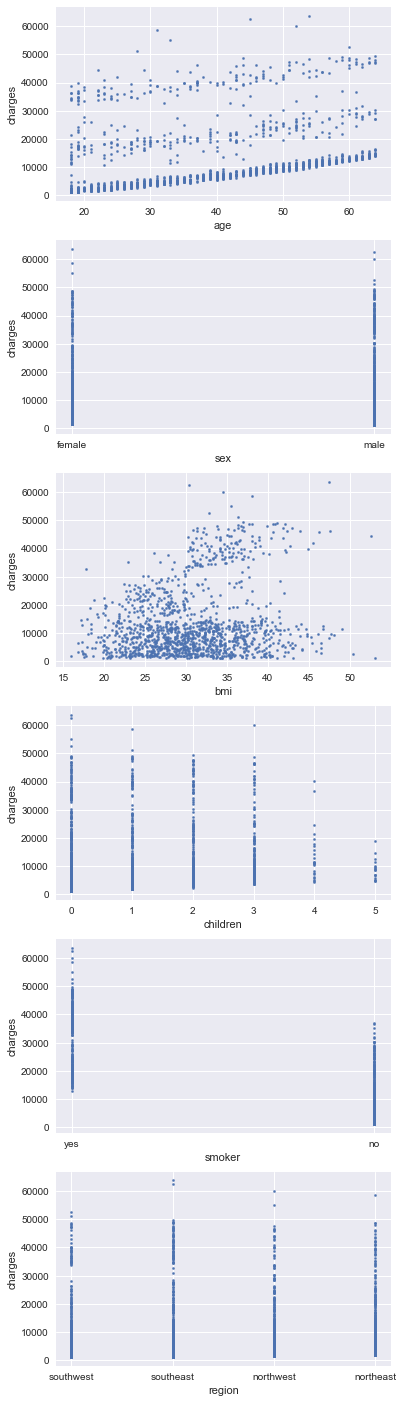

In [8]:
plt.style.use('seaborn')
colnum=len(dataset.columns)-1
fig,ax=plt.subplots(colnum,1,figsize=(6,25))
ax[0].set_ylabel("charges")
p_vals={}
for ind,col in enumerate([i for i in dataset.columns if i in ["smoker","region","bmi","sex","age", "children"]]):
    
    ax[ind].scatter(dataset[col],dataset.charges,s=5)
    ax[ind].set_xlabel(col)
    ax[ind].set_ylabel("charges") 

plt.show()

### Data Preprocessing

We have two columns in the dataset that contain categorical attributes i.e. yes, no, northwest etc. We would use Integer encoding for the Smoker and Sex column  and One hot encoding for the region variable.

### Encoding the categorical variables

In [9]:
#For the Smoker and Sex column, we use integer/label encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:,4] = le.fit_transform(X[:,4])
X[:,1] = le.fit_transform(X[:,1])
#X[:,5]
print(X[0])

[19 0 27.9 0 1 'southwest']


In [10]:
#For the Region variable, we use one hot encoding
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [5])], remainder='passthrough')
X = np.array(ct.fit_transform(X))
print(X[0])

[0.0 0.0 0.0 1.0 19 0 27.9 0 1]


### Splitting the dataset in Training set and Test set

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

### Training the different models 

We will train the different regression models on the training set, the models include Multilinear regression, Polynomial Regression, Decision Tree Regression, Random Forest Regression and Support Vector Regression

In [29]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

In [16]:
def MultiLinearRegressionMode(X_train, y_train, X_test):
    #X_train = X_train[:,[4,6,7,8]]
    regressor = LinearRegression()
    regressor.fit(X_train, y_train)
    #X_test = X_test[:,[4,6,7,8]]
    
    y_pred = regressor.predict(X_test)
    return y_pred

In [17]:
def PolynomialRegressionMode(X_train, y_train, X_test):
    poly_reg = PolynomialFeatures(degree = 4)
    X_poly = poly_reg.fit_transform(X_train)
    regressor = LinearRegression()
    regressor.fit(X_poly, y_train)
    
    y_pred = regressor.predict(poly_reg.transform(X_test))
    
    return y_pred
    

In [18]:
def SVR_mode(X_train, y_train, X_test):
    
    y_train = y_train.reshape(len(y_train),1)
    
    #X_train = X_train[:,[4,6,7,8]]
   # X_test = X_test[:,[4,6,7,8]]
    
    sc_X = StandardScaler()
    sc_y = StandardScaler()
    
    X_train = sc_X.fit_transform(X_train)
    y_train = sc_y.fit_transform(y_train)

    
    regressor = SVR(kernel = 'rbf')
    regressor.fit(X_train, y_train)
    y_pred = sc_y.inverse_transform(regressor.predict(sc_X.transform(X_test)))
    
    return y_pred

In [19]:
def RandomForestRegressionMode(X_train, y_train, X_test):
    regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
    regressor.fit(X_train, y_train)
    y_pred = regressor.predict(X_test)
    return y_pred

In [20]:
def DecisionTreeRegressionMode(X_train, y_train, X_test):
    regressor = DecisionTreeRegressor(random_state = 0)
    regressor.fit(X_train, y_train)
    y_pred = regressor.predict(X_test)
    
    return y_pred

In [47]:
def XGBMode(X_train, y_train, X_test):
    regressor = XGBRegressor()
    regressor.fit(X_train, y_train)
    y_pred = regressor.predict(X_test)
    
    return y_pred

### Model Selection

In [21]:
from sklearn.metrics import r2_score
r2_score(y_test, MultiLinearRegressionMode(X_train, y_train, X_test))

0.7623311844057112

In [22]:
r2_score(y_test, PolynomialRegressionMode(X_train, y_train, X_test))

0.7785816290688667

In [23]:
r2_score(y_test, RandomForestRegressionMode(X_train, y_train, X_test))

0.8353429874388509

In [24]:
r2_score(y_test, DecisionTreeRegressionMode(X_train, y_train, X_test))

0.7499662232593706

In [25]:
r2_score(y_test, SVR_mode(X_train, y_train, X_test))

C:\Users\lisung\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8599446699302741

In [48]:
r2_score(y_test, XGBMode(X_train, y_train, X_test))

[11:16:58] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


0.8797596683054297

Based on the R squared value, the best model for this predictor is XGBoost Regressor Model 

In [44]:
from sklearn.datasets import make_regression
from xgboost import XGBRegressor
from matplotlib import pyplot
# define dataset
#X, y = make_regression(n_samples=1000, n_features=10, n_informative=5, random_state=1)
# define the model

dataset_copy = dataset
X_data = dataset_copy.iloc[:,:-1]
y_data = dataset_copy.iloc[:,-1]
X_data['sex'] = X_data['sex'].astype('category').cat.codes
X_data['smoker'] = X_data['smoker'].astype('category').cat.codes
X_data['region'] = X_data['region'].astype('category').cat.codes

model = XGBRegressor()
# fit the model
model.fit(X_data, y_data)
# get importance
importances = model.feature_importances_
# summarize feature importance
feature_names = X_data.columns
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for i,v in enumerate(importances):
    print('Feature: %0d, Score: %.5f' % (i,v))

# Plot the feature importances of the forest


[11:14:26] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Feature ranking:
Feature: 0, Score: 0.03903
Feature: 1, Score: 0.00211
Feature: 2, Score: 0.04848
Feature: 3, Score: 0.01089
Feature: 4, Score: 0.89167
Feature: 5, Score: 0.00781


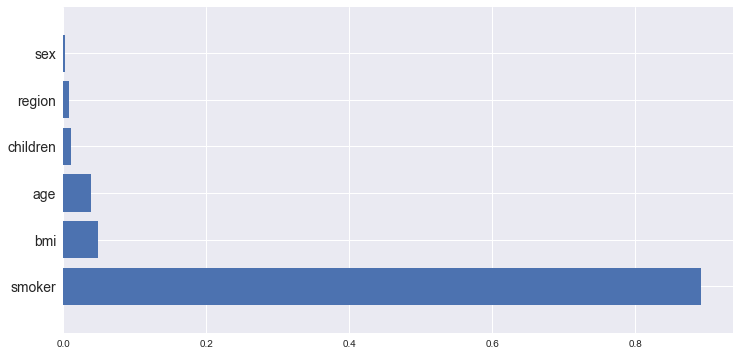

In [45]:
def feature_importance_graph(indices, importances, feature_names):
    plt.figure(figsize=(12,6))
    #plt.title("Determining Feature importances \n with Random Forest Classifier", fontsize=18)
    plt.barh(range(len(indices)), importances[indices],  align="center")
    plt.yticks(range(len(indices)), feature_names[indices], rotation='horizontal',fontsize=14)
    plt.ylim([-1, len(indices)])
    
    
    
feature_importance_graph(indices, importances, feature_names)
plt.show()

The most important features that influence the insurance changes of a client are;

- Smoker class - whether this client is a smoker or not
- BMI - if the customer Body Mass Index is high or not, the obesity range is anything above 30.0
- Age - As you age increases, the cost of insurance seems to be on the increase as well
